In [1]:
# importing a csv
# handling missing values in various ways
# descriptive statistics
# looking for longtail
# linear regression- but this is really the old way to do it

In [2]:
import pandas as pd
import numpy as np

#seaborn is used to do plots
import seaborn as sns

#matplot lib is used to do 
from matplotlib import pyplot as plt
%matplotlib inline

#since I may get warnings, I can do the following
import warnings
warnings.filterwarnings("ignore")

In [3]:
#to load csv
df = pd.read_csv('dataset.csv')

In [4]:
#look at first rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


# To look for missing values

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#to use only a few columns
usecols = ['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

data = pd.read_csv('dataset.csv', usecols=usecols)

In [7]:
data.head(10)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
5,40.74767,-73.97500,200,3,74,0.59,1,129
6,40.68688,-73.95596,60,45,49,0.40,1,0
7,40.76489,-73.98493,79,2,430,3.47,1,220
8,40.80178,-73.96723,79,2,118,0.99,1,0
9,40.71344,-73.99037,150,1,160,1.33,4,188


In [8]:
#easy way to see if there are any missing values (nan)
data.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<AxesSubplot:>

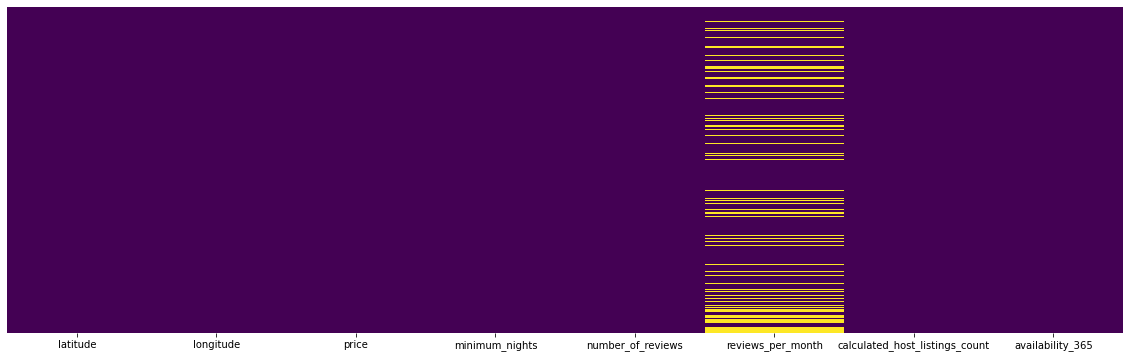

In [9]:
#to visually see the missing cells -- I kind-a love this!
plt.figure(figsize=(20, 6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# To remove rows with missing values
### Either do this, or jump to putting in the mean or 0's

In [10]:
print(data.shape)

# drop rows with missing values
data.dropna(inplace=True)

# summarize the shape of the data with missing rows removed
print(data.shape)

(48895, 8)
(38843, 8)


In [11]:
data.isnull().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<AxesSubplot:>

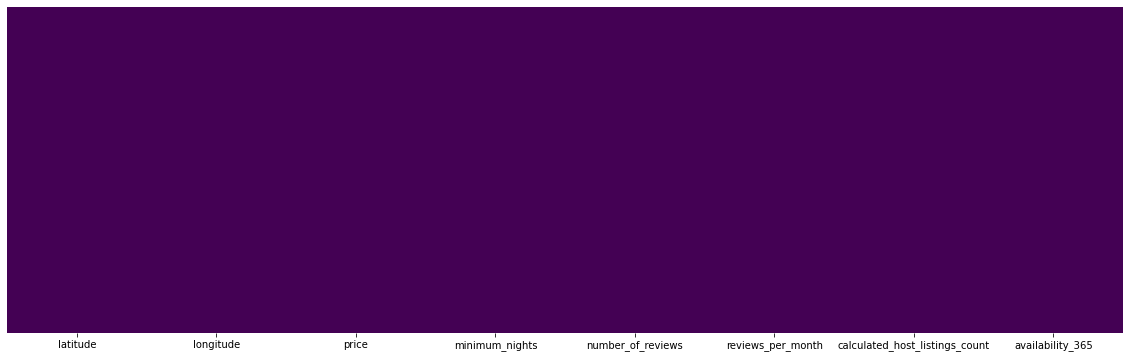

In [12]:
plt.figure(figsize=(20, 6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Or, put the mean into cells that have missing data

In [ ]:
data.fillna(data.mean(), inplace=True)
# count the number of NaN values in each column
print(data.isnull().sum())

In [ ]:
print(data.shape)

# Or put a 0 in the cells that have missing data

In [ ]:
#look for the column name that had missing data - here it was "reviews_per_month"
data.isnull().sum()

In [ ]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [ ]:
data.isnull().sum()

# Descriptive Statistics

In [21]:
data.describe(percentiles=[.0, .5, .75]).T

,count,mean,std,min,0%,50%,75%,max
latitude,38843.0,40.728134,0.054990,40.50641,40.50641,40.72171,40.76299,40.91306
longitude,38843.0,-73.951148,0.046695,-74.24442,-74.24442,-73.95480,-73.93502,-73.71299
price,38843.0,142.317947,196.945624,0.00000,0.00000,101.00000,170.00000,10000.00000
minimum_nights,38843.0,5.868059,17.384784,1.00000,1.00000,2.00000,4.00000,1250.00000
number_of_reviews,38843.0,29.297557,48.186374,1.00000,1.00000,9.00000,33.00000,629.00000
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.01000,0.72000,2.02000,58.50000
calculated_host_listings_count,38843.0,5.164457,26.295665,1.00000,1.00000,1.00000,2.00000,327.00000
availability_365,38843.0,114.882888,129.543636,0.00000,0.00000,55.00000,229.00000,365.00000


<AxesSubplot:xlabel='price', ylabel='Density'>

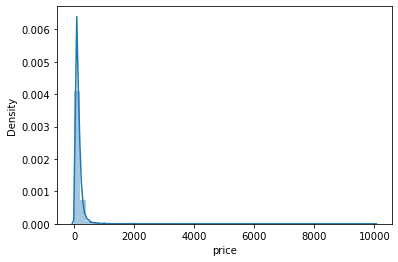

In [22]:
#to see if the column 'price' has a long tail, which it does
sns.distplot(data.price)

# Linear Regression

In [23]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

# Shuffle and splitting into 3 (train, val, test)

In [24]:
#to shuffle the dataset and use a seed of 42
#and split it into three subsamples/three datasets
#train = 60%, validate = 20%, test = 20%
n = len(data)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = data.iloc[idx]

In [25]:
#apply the log

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [26]:
#reset the index column
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [27]:
#then I'm going to train
y_train_orig = df_train.price.values
y_val_orig = df_val.price.values
y_test_orig = df_test.price.values

y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [28]:
#and then drop the price column  - We did this because we were going to predict price ultimately
del df_train['price']
del df_val['price']
del df_test['price']

# Root Mean Square Error test (RMSE)
## The lower the number the better because it shows how
## how far from the regression line data points are

In [30]:
#prepare data for the columns --- for this case, we are adding 0's to missing data
check = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

def prepare_X(df, fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [31]:
#RMSE test function
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

mean = df_train.reviews_per_month.mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

X_mean_val = prepare_X(df_val, fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

np.round(rmse(y_val, y_mean_pred_val),2)

0.6